# cryoCARE odd-and_even registered
N2N (Noise2Noise) denoising del volumen small_vol. Utiliza 4 volúmenes:

1. $V_1$, con los planos Z pares ("even").
2. $V_2$, con los planos Z impares ("odd").
3. $V_3$, con los slices Z impares proyectados sobre los slices pares.
4. $V_4$, con los slices Z pares proyectados sobre los slices impares.

Todos los ficheros temporales se crean en `/nas/vruiz/cryoCARE/small_vol`.

## Creamos $V_2$
El volumen "odd" proyectado. Para ello usamos los volúmenes even y odd ya generados previsamente en el experimento cryoCARE__even_odd.ipynb.

In [2]:
%run project_odd_even_and_viceversa.ipynb

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

## Configuramos cryoCARE

In [8]:
%%writefile /nas/vruiz/cryoCARE/small_vol/train_data_config__odd_even_registered.json
{
    "even": ["even.mrc", "odd_registered.mrc"],
    "odd": ["even_registered.mrc", "odd.mrc"],
    "mask": [""],
    "patch_shape": [8, 8, 8],
    "num_slices": 800,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./odd_even_registered_data",
    "overwrite": "True"  
}

Overwriting /nas/vruiz/cryoCARE/small_vol/train_data_config__odd_even_registered.json


In [9]:
%%bash
cd /nas/vruiz/cryoCARE/small_vol
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__odd_even_registered.json

2025-10-21 11:52:50.000546: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(20, 256, 256), sample_shape=[8, 8, 8]
even.data.shape=(20, 256, 256), sample_shape=[8, 8, 8]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 18814.44it/s]


## Entrenamos

In [10]:
%%writefile /nas/vruiz/cryoCARE/small_vol/train_config__odd_even_registered.json
{
  "train_data": "./odd_even_registered_data",
  "epochs": 50,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [1]
}

Writing /nas/vruiz/cryoCARE/small_vol/train_config__odd_even_registered.json


In [11]:
%%bash
cd /nas/vruiz/cryoCARE/small_vol
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__odd_even_registered.json

2025-10-21 11:53:06.878816: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-21 11:53:09.490443: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-21 11:53:09.491815: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-21 11:53:09.511067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-21 11:53:09.512486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-21 11:53:09.512557: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
0 1
1 8
2 8
3 8
4 1
Epoch 1/50


2025-10-21 11:53:13.155307: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-21 11:53:14.424945: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-21 11:53:14.482210: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-21 11:53:15.136422: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-21 11:53:15.473466: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-21 11:53:36.758065: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding 

200/200 [==============================] - 38s 70ms/step - loss: 0.5632 - mse: 0.5632 - mae: 0.5580 - val_loss: 0.4861 - val_mse: 0.4861 - val_mae: 0.5317
Epoch 2/50
200/200 [==============================] - 2s 12ms/step - loss: 0.4541 - mse: 0.4541 - mae: 0.5163 - val_loss: 0.4627 - val_mse: 0.4627 - val_mae: 0.5206
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 0.4420 - mse: 0.4420 - mae: 0.5111 - val_loss: 0.4597 - val_mse: 0.4597 - val_mae: 0.5185
Epoch 4/50
200/200 [==============================] - 2s 12ms/step - loss: 0.4391 - mse: 0.4391 - mae: 0.5096 - val_loss: 0.4561 - val_mse: 0.4561 - val_mae: 0.5171
Epoch 5/50
200/200 [==============================] - 2s 12ms/step - loss: 0.4377 - mse: 0.4377 - mae: 0.5084 - val_loss: 0.4558 - val_mse: 0.4558 - val_mae: 0.5169
Epoch 6/50
200/200 [==============================] - 2s 11ms/step - loss: 0.4350 - mse: 0.4350 - mae: 0.5070 - val_loss: 0.4557 - val_mse: 0.4557 - val_mae: 0.5151
Epoch 7/50
200/200 [

/home/jupyter-vruiz/envs/cryoCARE/lib/python3.8/site-packages/csbdeep/models/base_model.py:149: UserWarning: output path for model already exists, files may be overwritten: /nas/vruiz/cryoCARE/small_vol/model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))



Loading network weights from 'weights_best.h5'.


## Inferimos

In [13]:
%%writefile /nas/vruiz/cryoCARE/small_vol/predict_config__odd_even_registered.json
{
    "path": "./model.tar.gz",
    "even": ["small_vol.mrc"], 
    "odd": ["small_vol.mrc"],
    "n_tiles": [1,1,1],
    "output": "odd_even_registered_denoised",
    "overwrite": "True",
    "gpu_id": [1]
}

Overwriting /nas/vruiz/cryoCARE/small_vol/predict_config__odd_even_registered.json


In [14]:
%%bash
cd /nas/vruiz/cryoCARE/small_vol
pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__odd_even_registered.json || true

/nas/vruiz/cryoCARE/small_vol


2025-10-21 11:56:01.836087: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-21 11:56:07.219944: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-21 11:56:07.220671: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-21 11:56:07.241476: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-21 11:56:07.242720: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-21 11:56:07.242791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
Loading network weights from 'weights_best.h5'.
(32, 256, 256, 1)
['' '' '' '' '' '' '' ''
 'cryoCARE                                                21-Oct-25  11:56:20     '
 '']


In [15]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [17]:
mrc_file_path = '/nas/vruiz/cryoCARE/small_vol/small_vol.mrc'
original_vol = read_MRC(mrc_file_path)

In [18]:
mrc_file_path = '/nas/vruiz/cryoCARE/small_vol/odd_even_registered_denoised/small_vol.mrc'
denoised_vol = read_MRC(mrc_file_path)

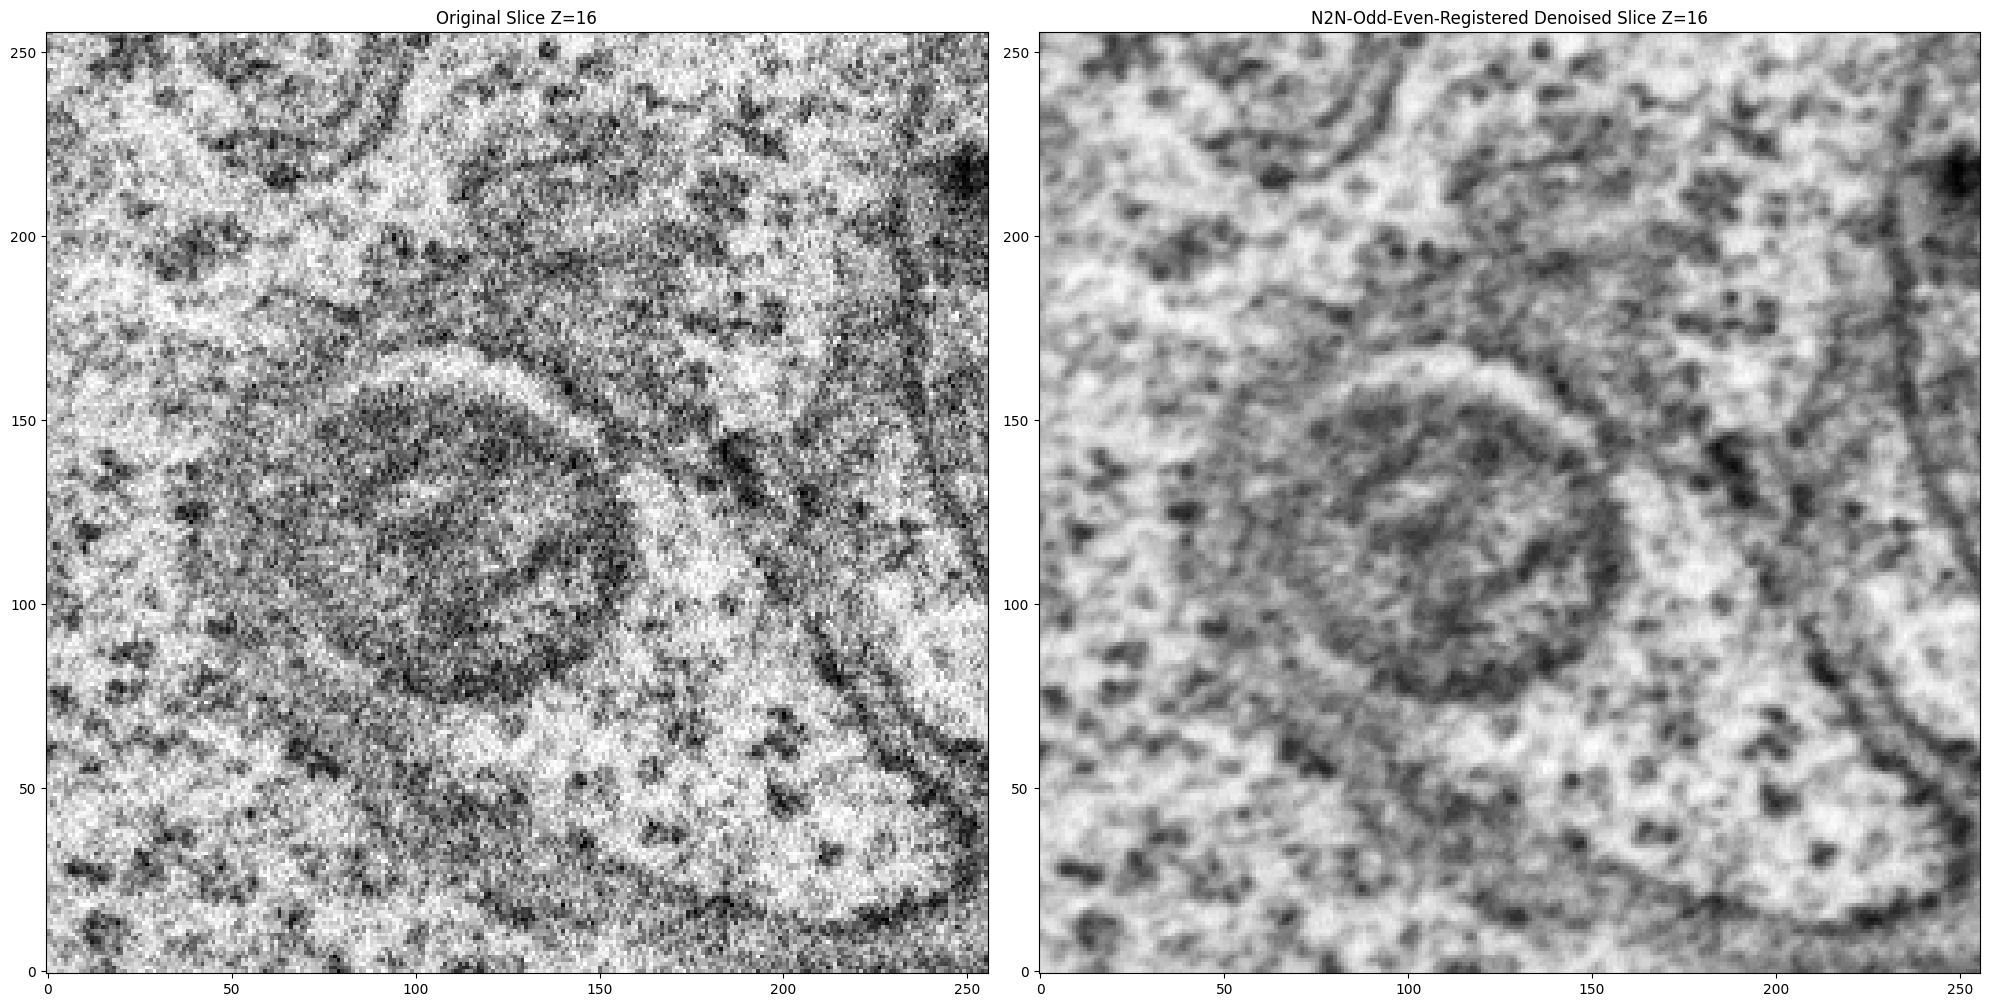

In [19]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

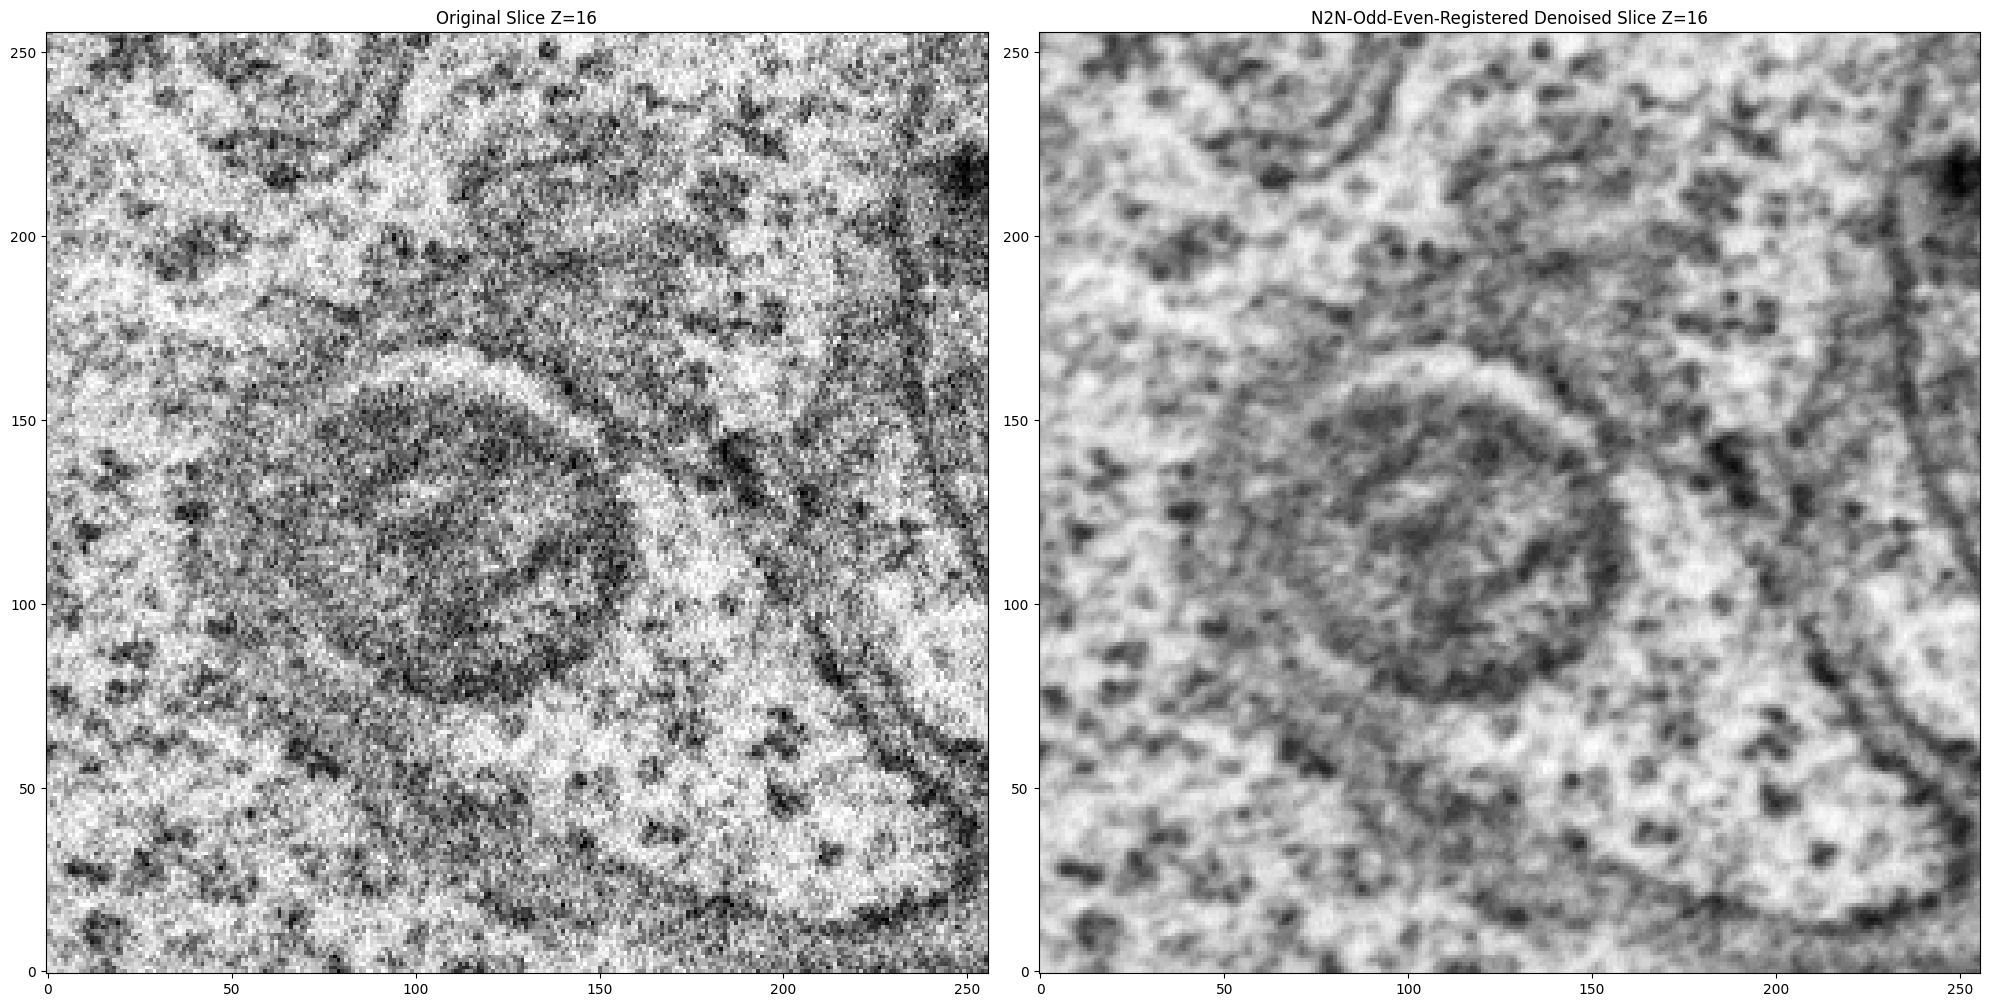

In [20]:
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, :256, :256].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, :256, :256].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_2627543/2484330788.py:6: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im1 = axes[0].imshow(original_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
/tmp/ipykernel_2627543/2484330788.py:6: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im1 = axes[0].imshow(original_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
/tmp/ipykernel_2627543/2484330788.py:11: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im2 = axes[1].imshow(denoised_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
/tmp/ipykernel_2627543/2484330788.py:11: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im2 = axes[1].imshow(denoised_vol[slice_idx, 500:1000, 1000:1500].T, cma

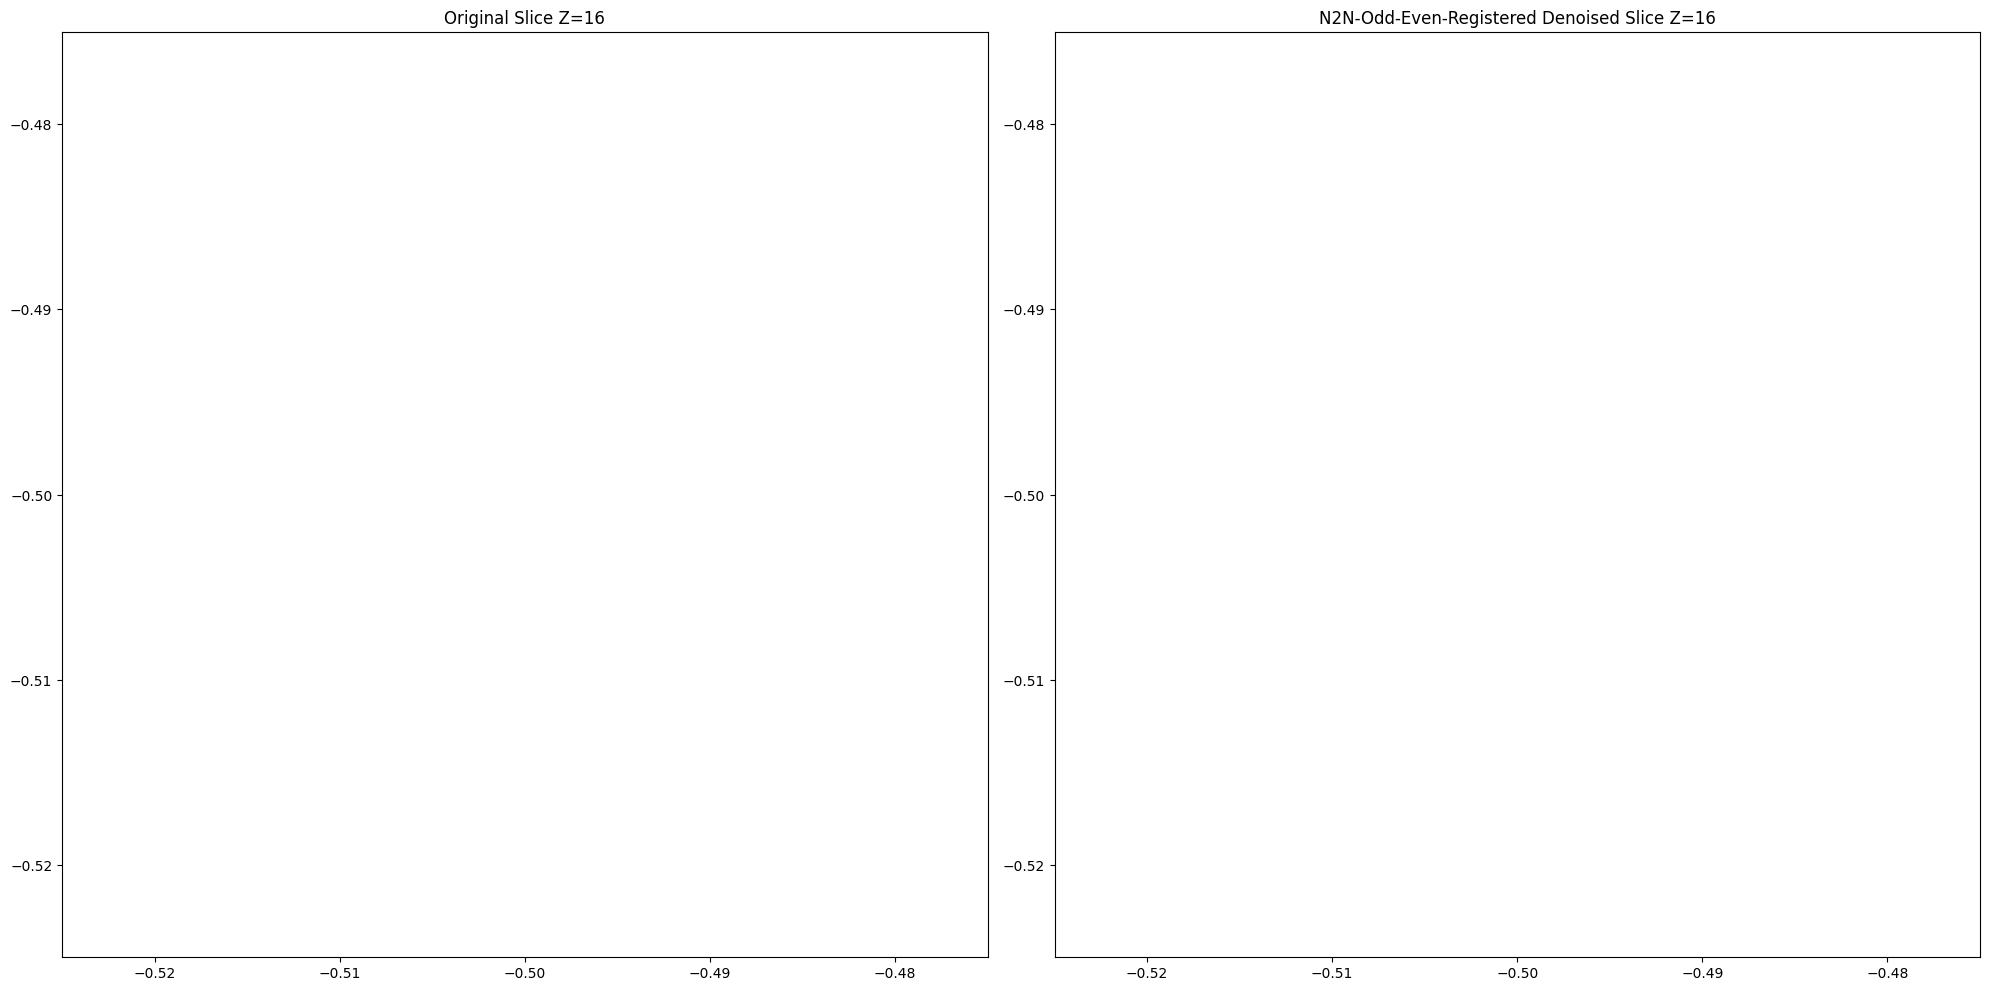

In [21]:
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()